<a href="https://colab.research.google.com/github/wqlevi/RGBD-CNN/blob/master/Copy_of_DL_NST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [ ]:
!pip install torch torchvision

In [ ]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


## Task 2 : Loading VGG Pretrained Model

In [ ]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

### `vgg.features` denotes network w/o `AdaptiveAvgPool2d` nor `(classifier)`

In [ ]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

### All parameters set to no gradient mode(e.g. parameter in each `conv layer`)

In [ ]:
for param in vgg.parameters():
  param.requires_grad_(False)

In [ ]:
device = torch.device("cuda")
print(device)


cuda


In [ ]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

* apply `torchvision.transforms` to dataset(_some support only image input, some allow tensor as well_)<br> 
* Also, one more dimension was added to the input image, the batch_size.(C,H,W to N,C,H,W)
* Normalization is done per channels


In [ ]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size = 500):
  image = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transforms = T.Compose([
                               T.Resize(size),
                               T.ToTensor(),
                               T.Normalize(mean = [0.485,0.456,0.406],
                                           std = [0.229,0.224,0.225])
                               ])
  image = img_transforms(image)
  image = image.unsqueeze(0) # expand 1 more dim
  return image

### Load images
- load images as content and style
- tranformed into tensor
- send them to GPU

In [ ]:
content_p = preprocess('/content/Project-NST/content10.jpg')
style_p  = preprocess('/content/Project-NST/style11.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print("content shape",content_p.shape)
print("style shape",style_p.shape)

content shape torch.Size([1, 3, 487, 487])
style shape torch.Size([1, 3, 500, 577])


## Task 4 : Deprocess image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0) # dim 1 -> dim 0
  image = image.transpose(1,2,0) # dim order corrected from tensor
  image = image * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406])
  image = image.clip(0,1)
  return image


In [ ]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("deprocessed content:",content_d.shape)
print("style content:",style_d.shape)

deprocessed content: (487, 487, 3)
style content: (500, 577, 3)


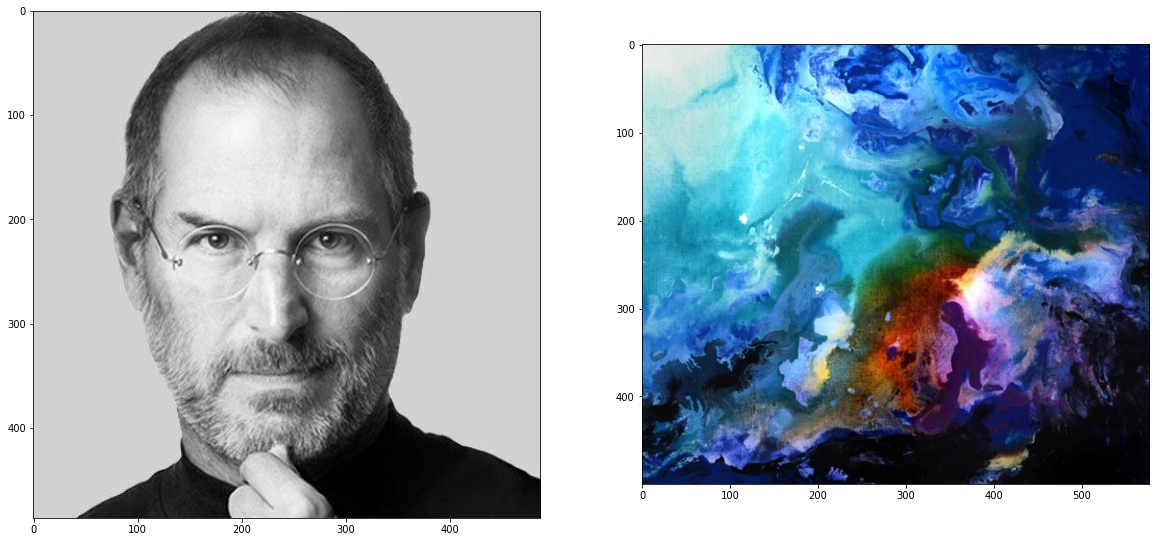

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [ ]:
def get_features(image,model):

  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2',
      '28': 'conv5_1'

  }
  x = image 

  features = {}
  for name, layer in model._modules.items():
    x = layer(x)

    if name in layers: # name: 0,5,10,19,21,28
      features[layers[name]] = x

  return features

In [ ]:
content_f = get_features(content_p,vgg)
style_f = get_features(style_p,vgg)





## visualization of images by feature maps(mean value cross all channels)

In [ ]:
def plot_feature_maps(features):
  fig,ax = plt.subplots(1, len(features), figsize = (20,10))
  ax = ax.ravel()
  for i,features_i in enumerate(features):
    mean_features = torch.mean(list(features.values())[i],dim = 1)
    ax[i].imshow(mean_features.squeeze(0).detach().to('cpu'))
    ax[i].set_title('mean of : '+ list(features.keys())[i])

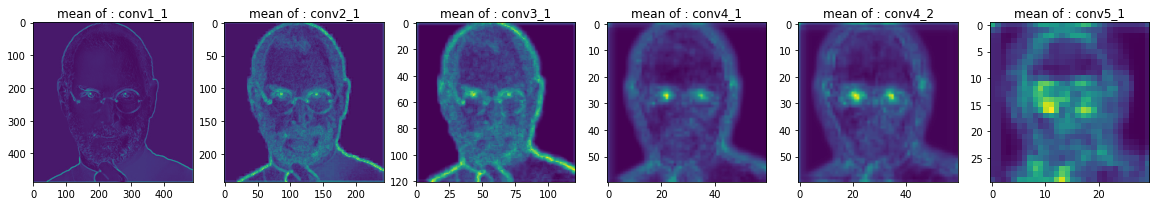

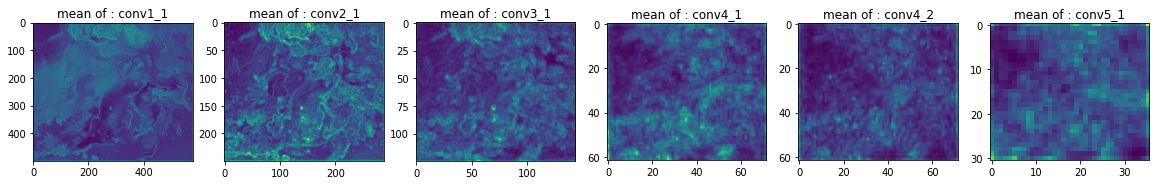

In [ ]:
plot_feature_maps(content_f)
plot_feature_maps(style_f)

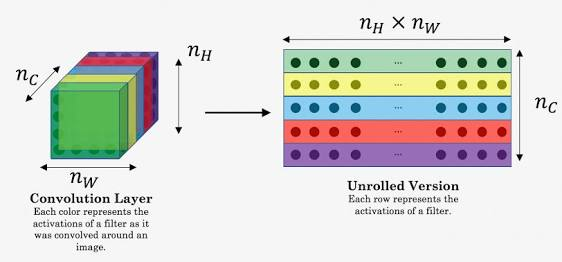

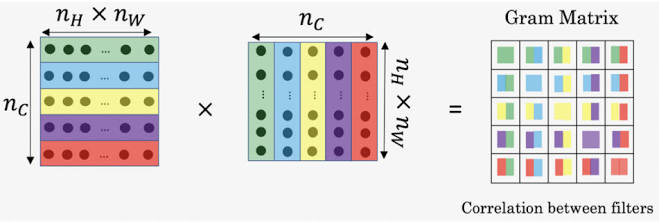

### A cross-correlation matrix between feature maps per `convi_1`
* Flatten individual feature maps
* multiply flattened feature maps by its transpose
* A correlation map of individual feature map was calculated

In [ ]:
def gram_matrix(tensor):
  b,c,h,w = tensor.size() # individual value per key
  tensor = tensor.view(c,h*w) # flatten H,W to 1D per image, but channel remains
  gram = torch.mm(tensor,tensor.t()) # matrix multiplication
  return gram

### Apply gram_matrix on individual conv layer in feature network 
`layer` as keys in `style_f`(e.g. `conv1_1` etc.)
* Extract correlation matrix of style input only

In [ ]:
style_gram = {layer : gram_matrix(style_f[layer]) for layer in style_f}

In [ ]:
def plot_gram_matrix(gram_matrix):
  fig,ax = plt.subplots(1,len(gram_matrix),figsize = (50,30))
  ax = ax.ravel()
  for i, gram in enumerate(gram_matrix.values()):
    ax[i].imshow(gram.detach().to('cpu'))
    ax[i].set_title(list(gram_matrix.keys())[i])
    ax[i].set_ylabel('feature maps per layer')



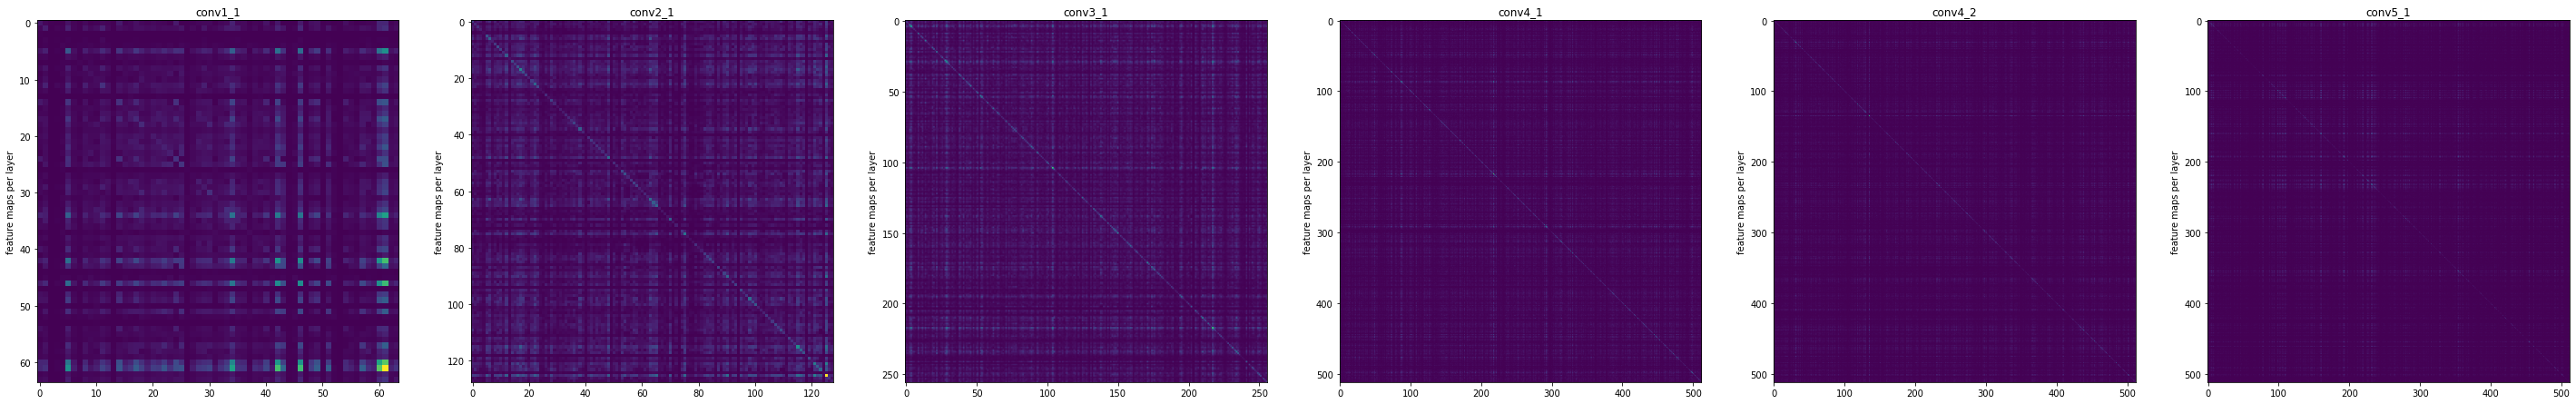

In [ ]:
plot_gram_matrix(style_gram)

## Task 6 : Creating Style and Content loss function

In [ ]:
def content_loss(target_conv4_2,content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [ ]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [ ]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0
  for layer in style_weights:
    target_f = target_features[layer] # identical feature map as content
    target_gram = gram_matrix(target_f) # correlation map of content map
    style_gram = style_grams[layer] # correlation map of style map
    b,c,h,w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2) # weighting on MSE
    loss += layer_loss / (c*h*w)
    return loss

In [ ]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg) # produce content feature map w/ gradient enabled
print("Content loss:", content_loss(target_f['conv4_2'], content_f['conv4_2'])) # calculate MSE of only conv4_2 layers
print("Style loss:", style_loss(style_weights, target_f, style_gram))# calculate MSE of only all layers w/ weighting


Content loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style loss: tensor(808.8412, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [ ]:
from torch import optim
optimizer = optim.Adam([target],lr = .003)

alpha = 1
beta = 1e5
epoch = 3000
show_every = 500


In [ ]:
def total_loss(content_loss,style_loss,alpha,beta):
  loss = alpha * content_loss + beta * style_loss
  return loss

In [ ]:
results = []

for i in range(epoch):
  target_f = get_features(target ,vgg)
  c_loss = content_loss(target_f['conv4_2'],content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_gram)
  t_loss = total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i% show_every == 0:
    print("Total loss at epoch {} : {}".format(i,t_loss))
    results.append(deprocess(target.detach()))

Total loss at epoch 0 : 80884120.0
Total loss at epoch 500 : 3038871.25
Total loss at epoch 1000 : 1169541.25
Total loss at epoch 1500 : 679950.0625
Total loss at epoch 2000 : 461133.28125
Total loss at epoch 2500 : 340671.75


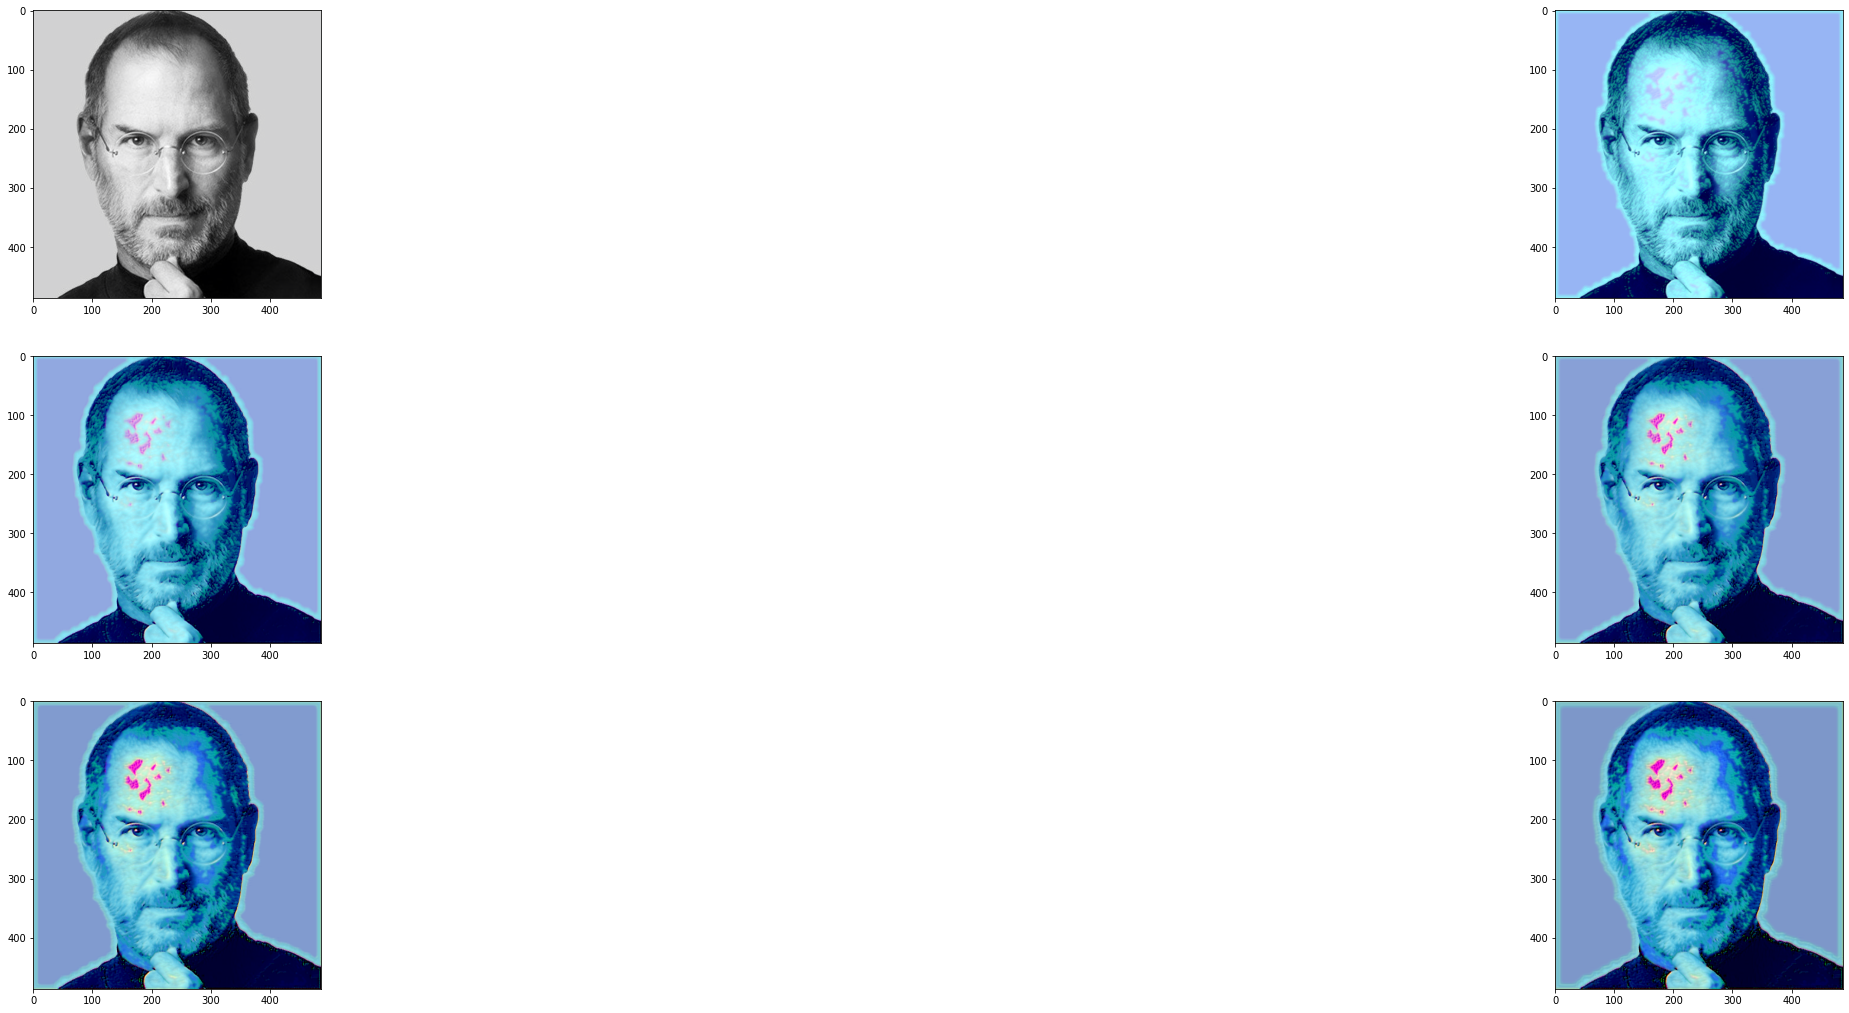

In [ ]:
plt.figure(figsize = (50,18))
for i in range(len(results)):

  plt.subplot(3,2,i+1)
  plt.imshow(results[i])

plt.show()

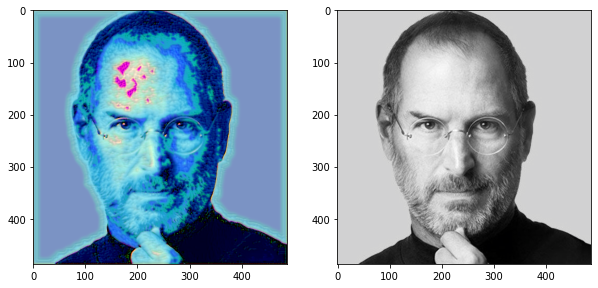

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)